### Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Uploading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge,LassoLarsCV, LassoLars
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

Uploading the dataset

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')

Creating a dataframe

In [3]:
df=pd.DataFrame(data=data)

Viewing the dataframe

In [4]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


## Exploratory Data Analysis

Checking the shape of the dataset

In [5]:
df.shape

(30, 17)

- Total of 30 rows and 17 columns present in the dataset

Checking the data types of all the columns

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

- All the columns are numerical. There are two types of data types present i.e. intger and float.
- Only one column 'ERA' is float type and rest of the columns are integer type.

Checking the info of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


- No null values observed in the dataset. Need to perform further analysis to verify

#### Observations
- We can observe that the all the columns are continuous numrical variables. 
- We need to predict the number of wins. Hence the column W is our target variable.
- The target variable is continuous numerical type. Hence, we needs to perform regression analysis on our dataset.

Checking for Null values of each column

In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

- No null values present in the dataset. 

Checking Statitical values using describe method

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


- The mean and median are nearly identical with minimal difference observed.
- Outliers may be present in columns CG, SHO, and E as indicated by the slight difference between the 75th percentile and the maximum values

### Data Visualization

Univariate analysis

Dividing all the dataset columns in 3 parts

In [10]:
all_columns=[column for column in df.columns]
column_list_1=all_columns[:9]
column_list_2=all_columns[9:18]

Histplot to visualize the columns

In [11]:
def histplot(column_list,df):
    plt.figure(figsize=(15,12))
    for index,column in enumerate(column_list):
        if index < len(column_list):
            plt.subplot(3,3,index+1)
            sns.histplot(x=column,kde=True,linewidth=.2,data=df)
            plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

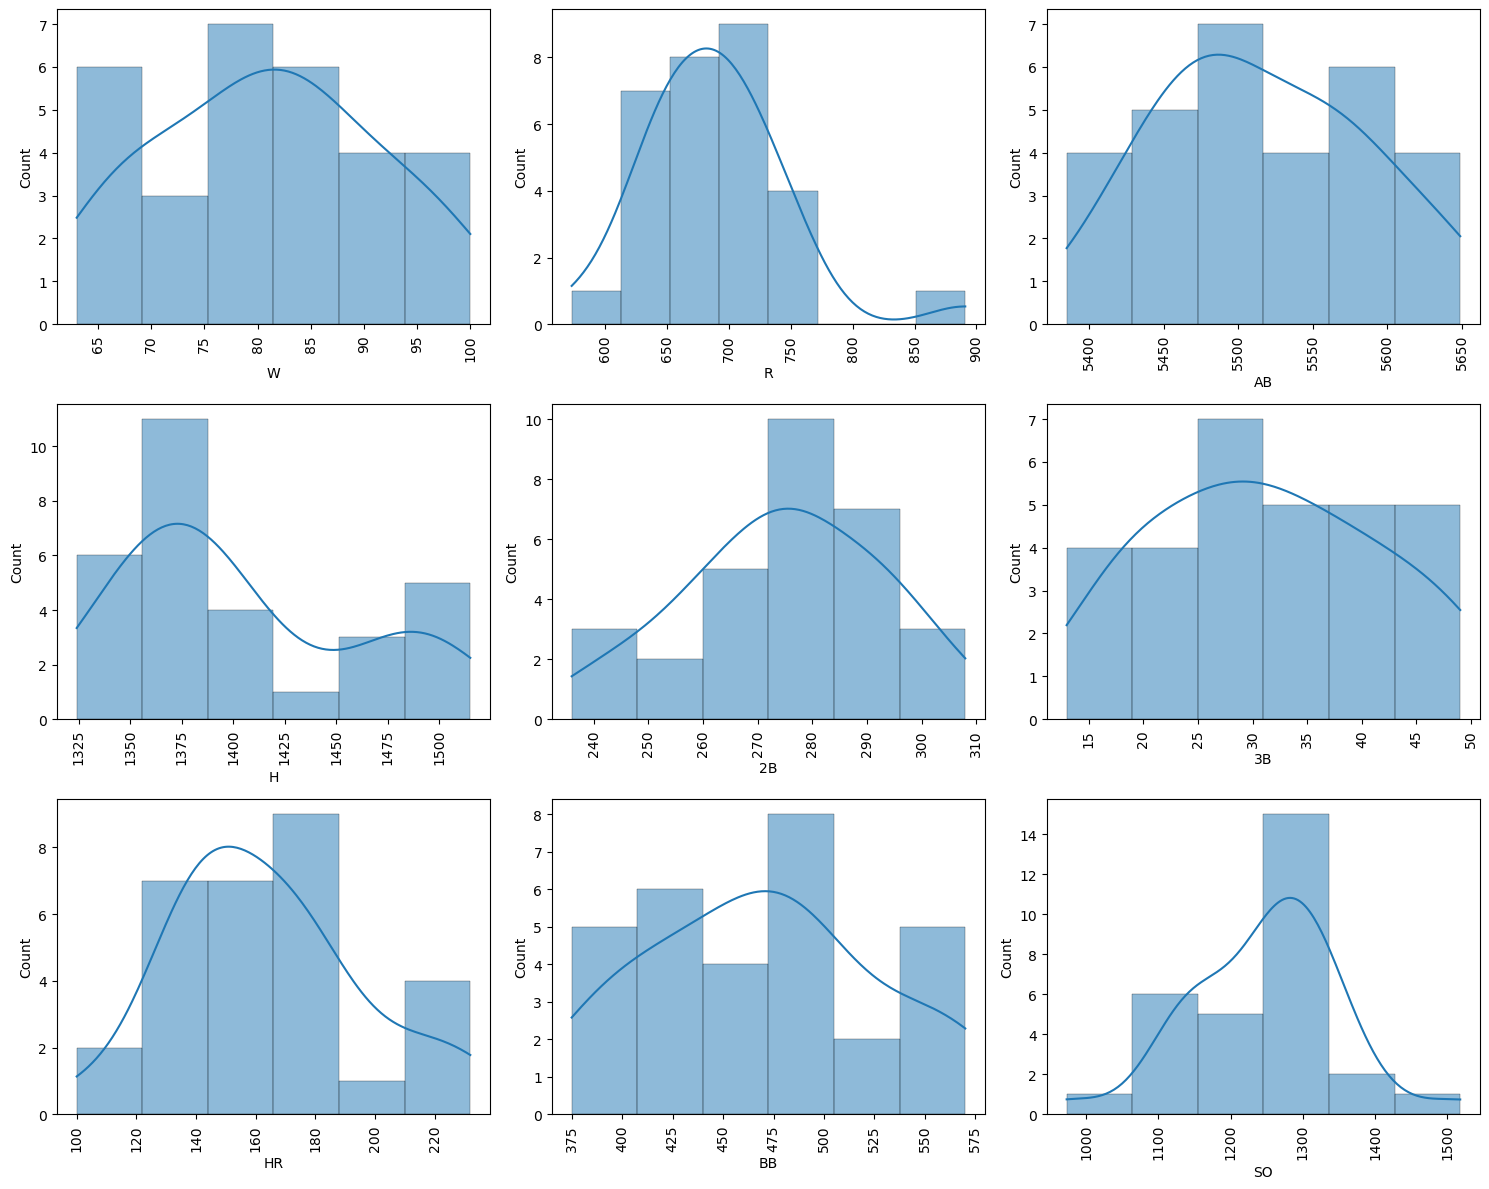

In [12]:
histplot(column_list_1,df)

- We can observe that column R is right skewed. No other skewness can be observed in any of the columns.   

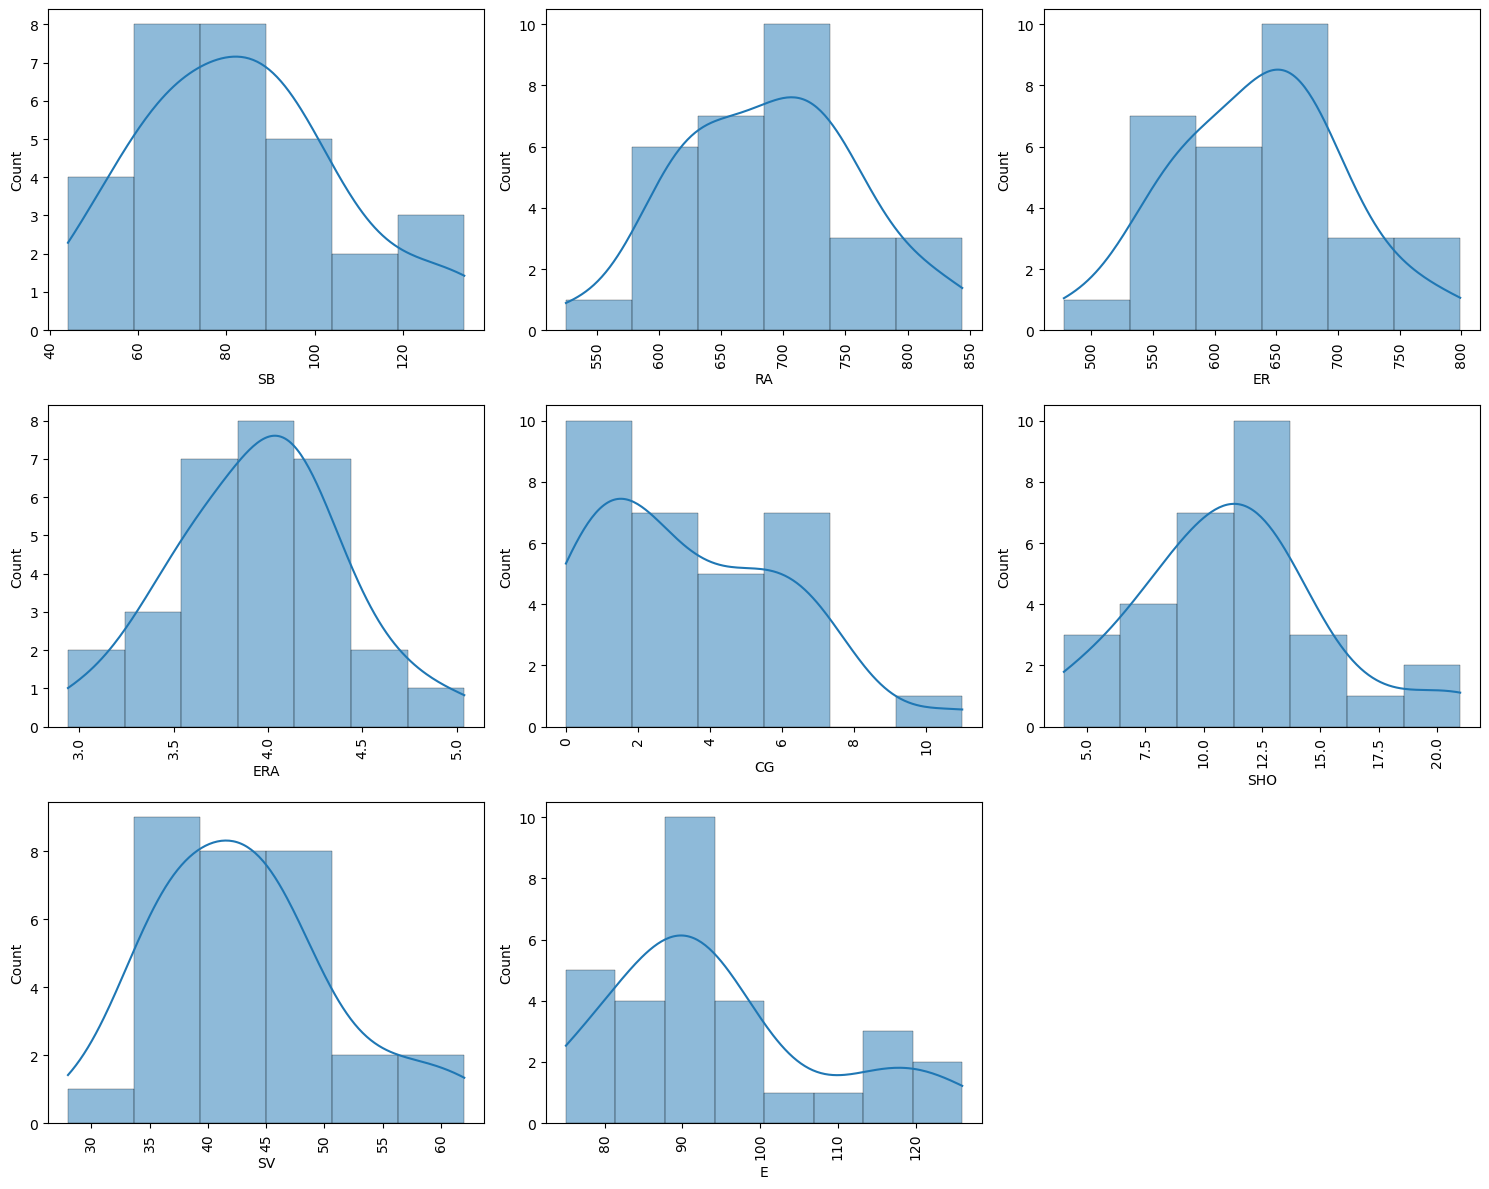

In [13]:
histplot(column_list_2,df)

- We notice that the columns CG, E, and RA exhibit a slight right skewed.
- No other columns have skewness observed.

Visualizing ERA with countplot based on performance

<Axes: xlabel='ERA', ylabel='count'>

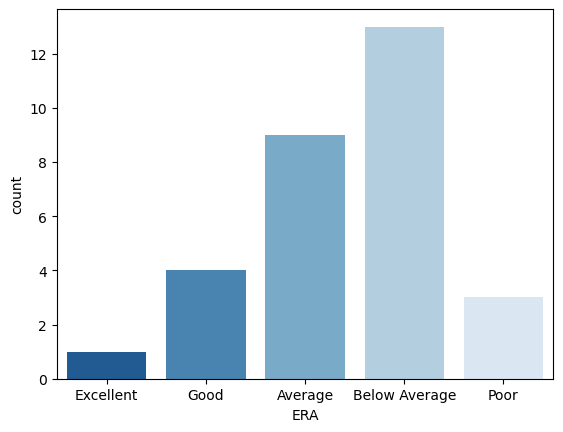

In [14]:
bins = [0, 3.00, 3.50, 4.00, 4.50, float('inf')]
labels = ['Excellent', 'Good', 'Average', 'Below Average', 'Poor']

era_binned=pd.cut(df['ERA'],bins=bins,labels=labels,right=False)
sns.countplot(x=era_binned,palette='Blues_r')

Bivariate analysis

Regression plot to visualize relation between W and independent columns 

In [15]:
def regplot(df,column_list):
    plt.figure(figsize=(15,12))
    for index,column in enumerate(column_list):
        if index<=len(column_list):
            plt.subplot(3,3,index+1)
            sns.regplot(data=df,x='W',y=column)
    plt.tight_layout()
    plt.show()

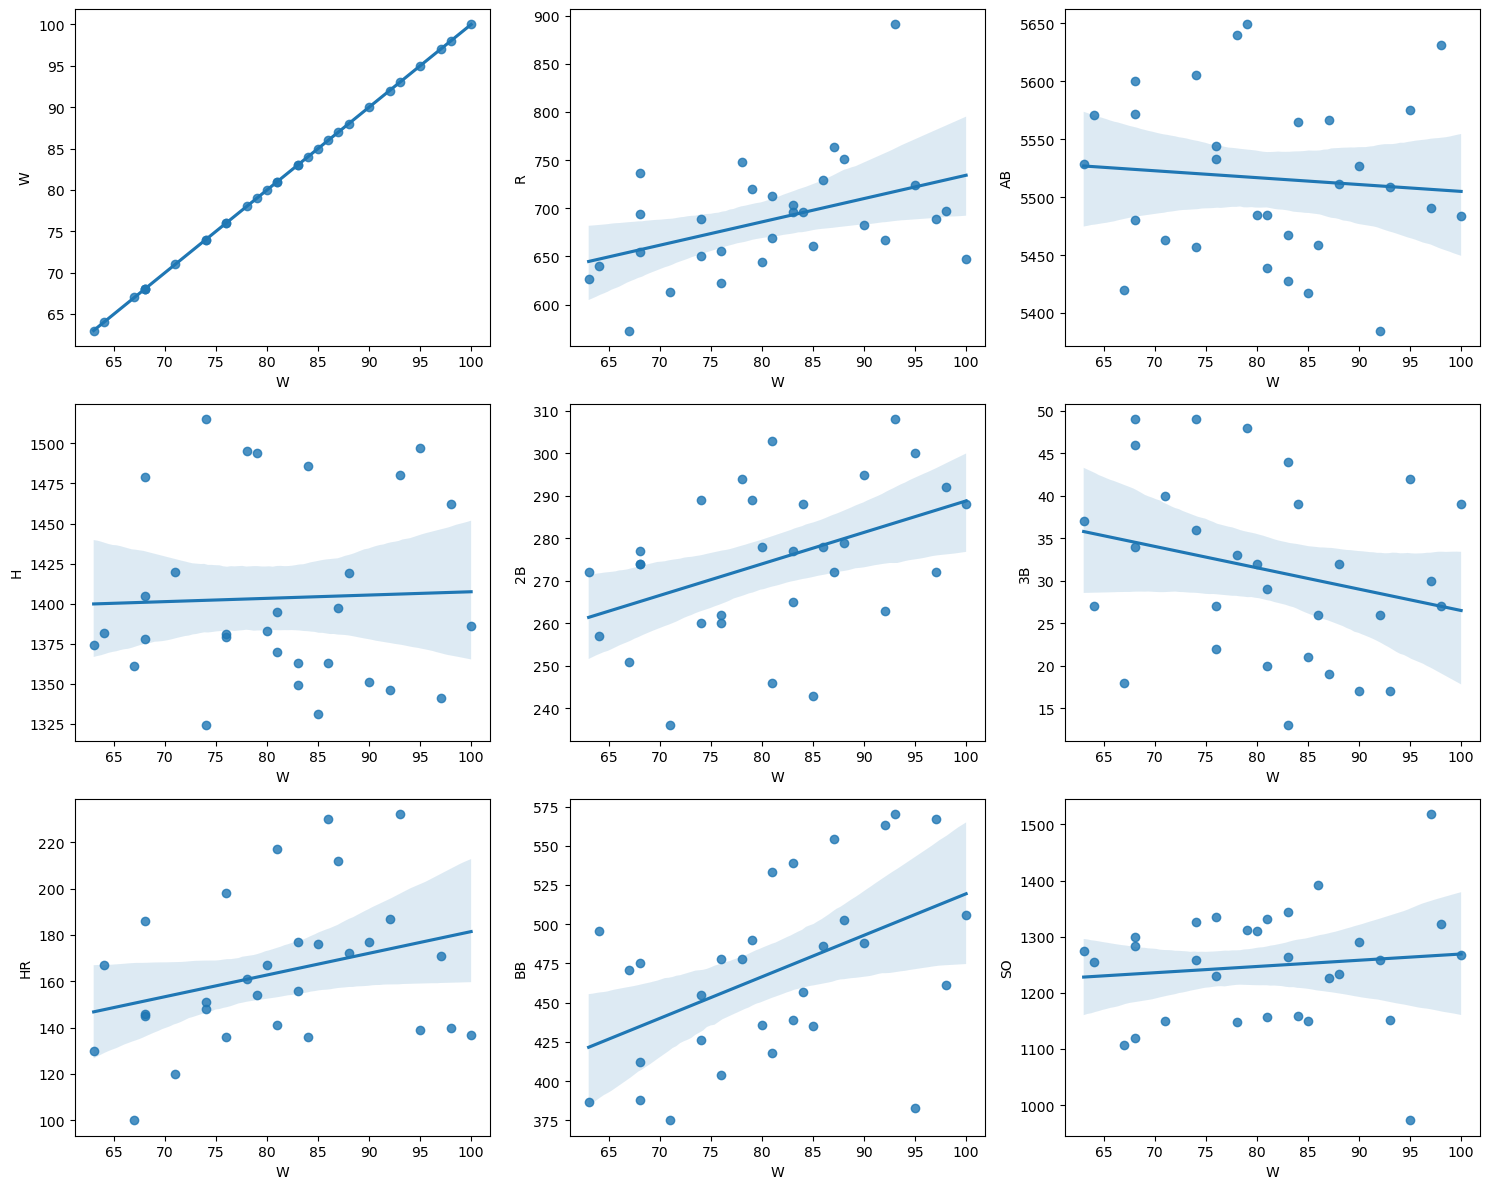

In [16]:
regplot(df,column_list_1)

- Teams with the most R, H, 2B, HR, BB and SO has a positive correlation wins (W).
- Teams with the most at-bats (AB) and triples (3B) have a negative correlation with wins (W).

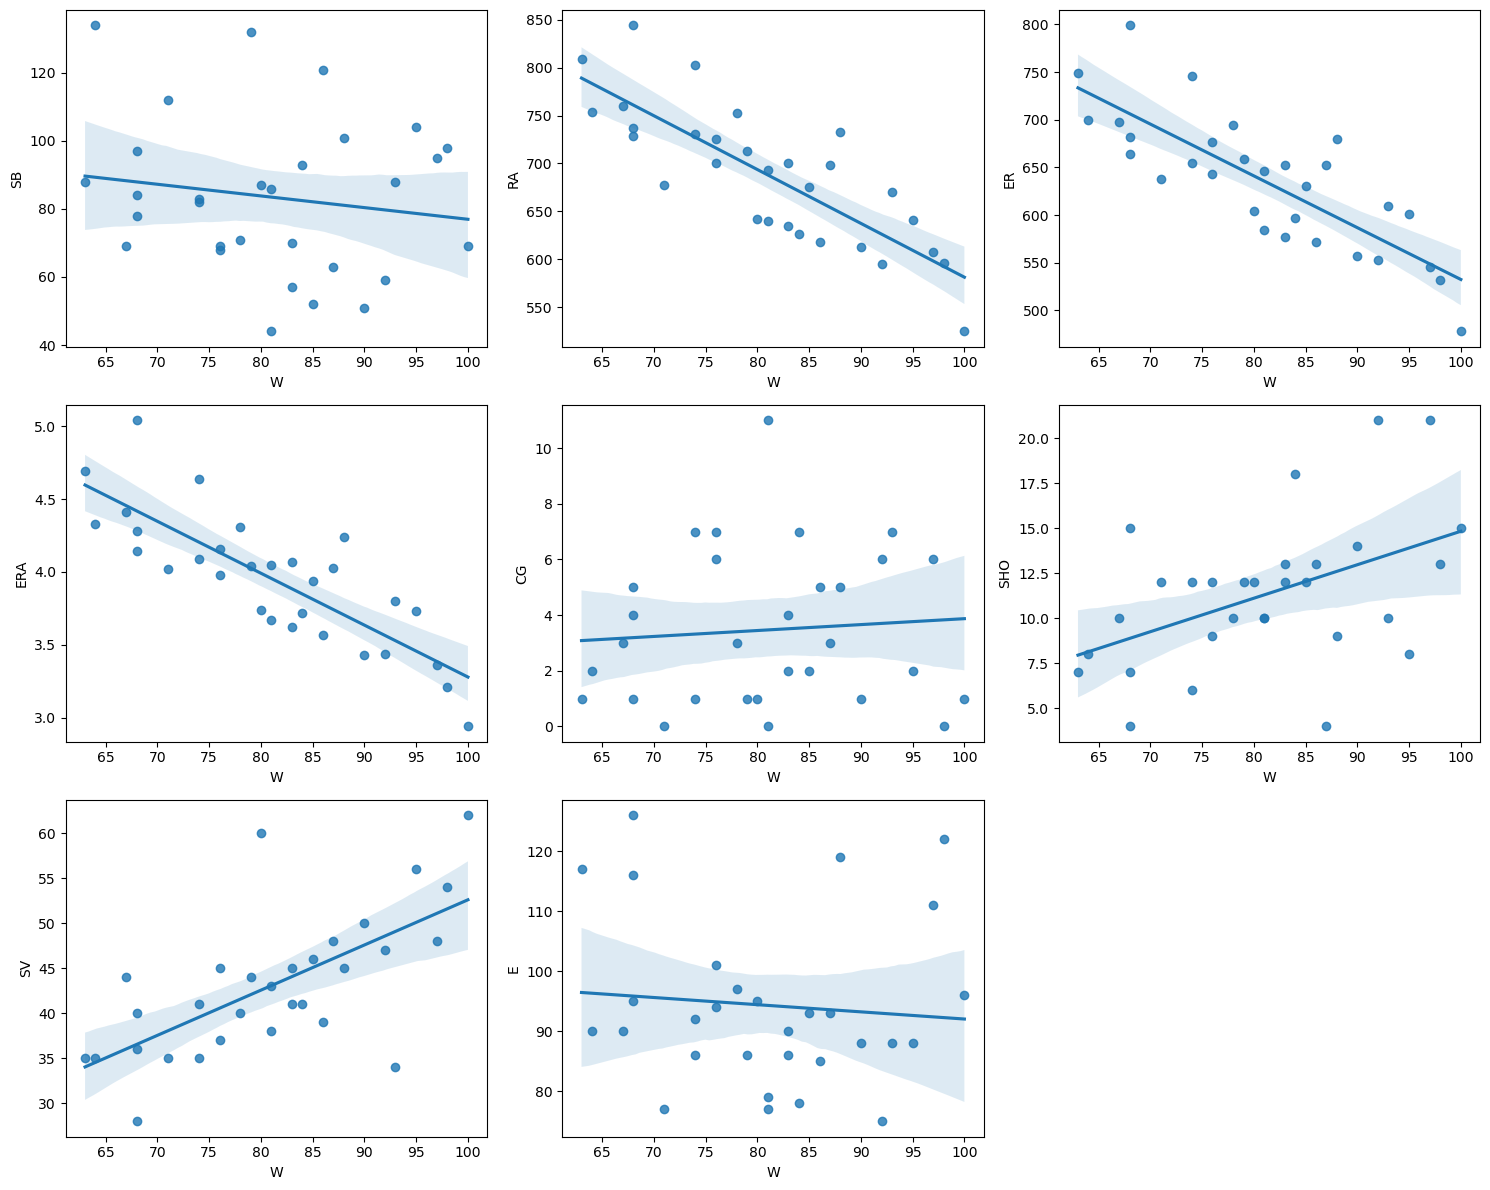

In [17]:
regplot(df,column_list_2)

- Teams with the most SB, RA, ER and ERA has a high negative correlation wins (W).
- Teams with the most SHO and SB have a high positive correlation with wins (W).
- Teams with CG has positive correlation with wins (W). 

Regression plot to check corelation between R and HR

<Axes: xlabel='HR', ylabel='R'>

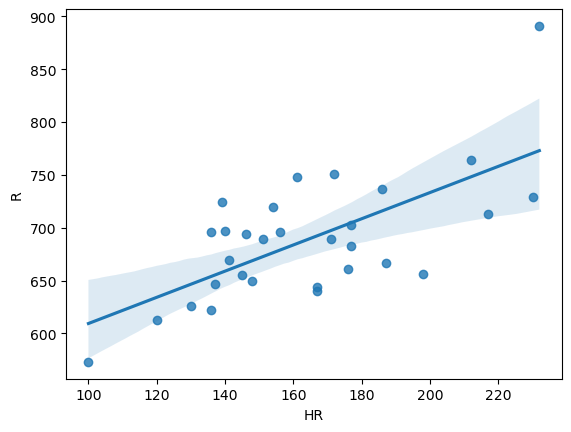

In [18]:
sns.regplot(data=df,x='HR',y='R')

- We can observe positve correlation between R and HR

Multivariate analysis

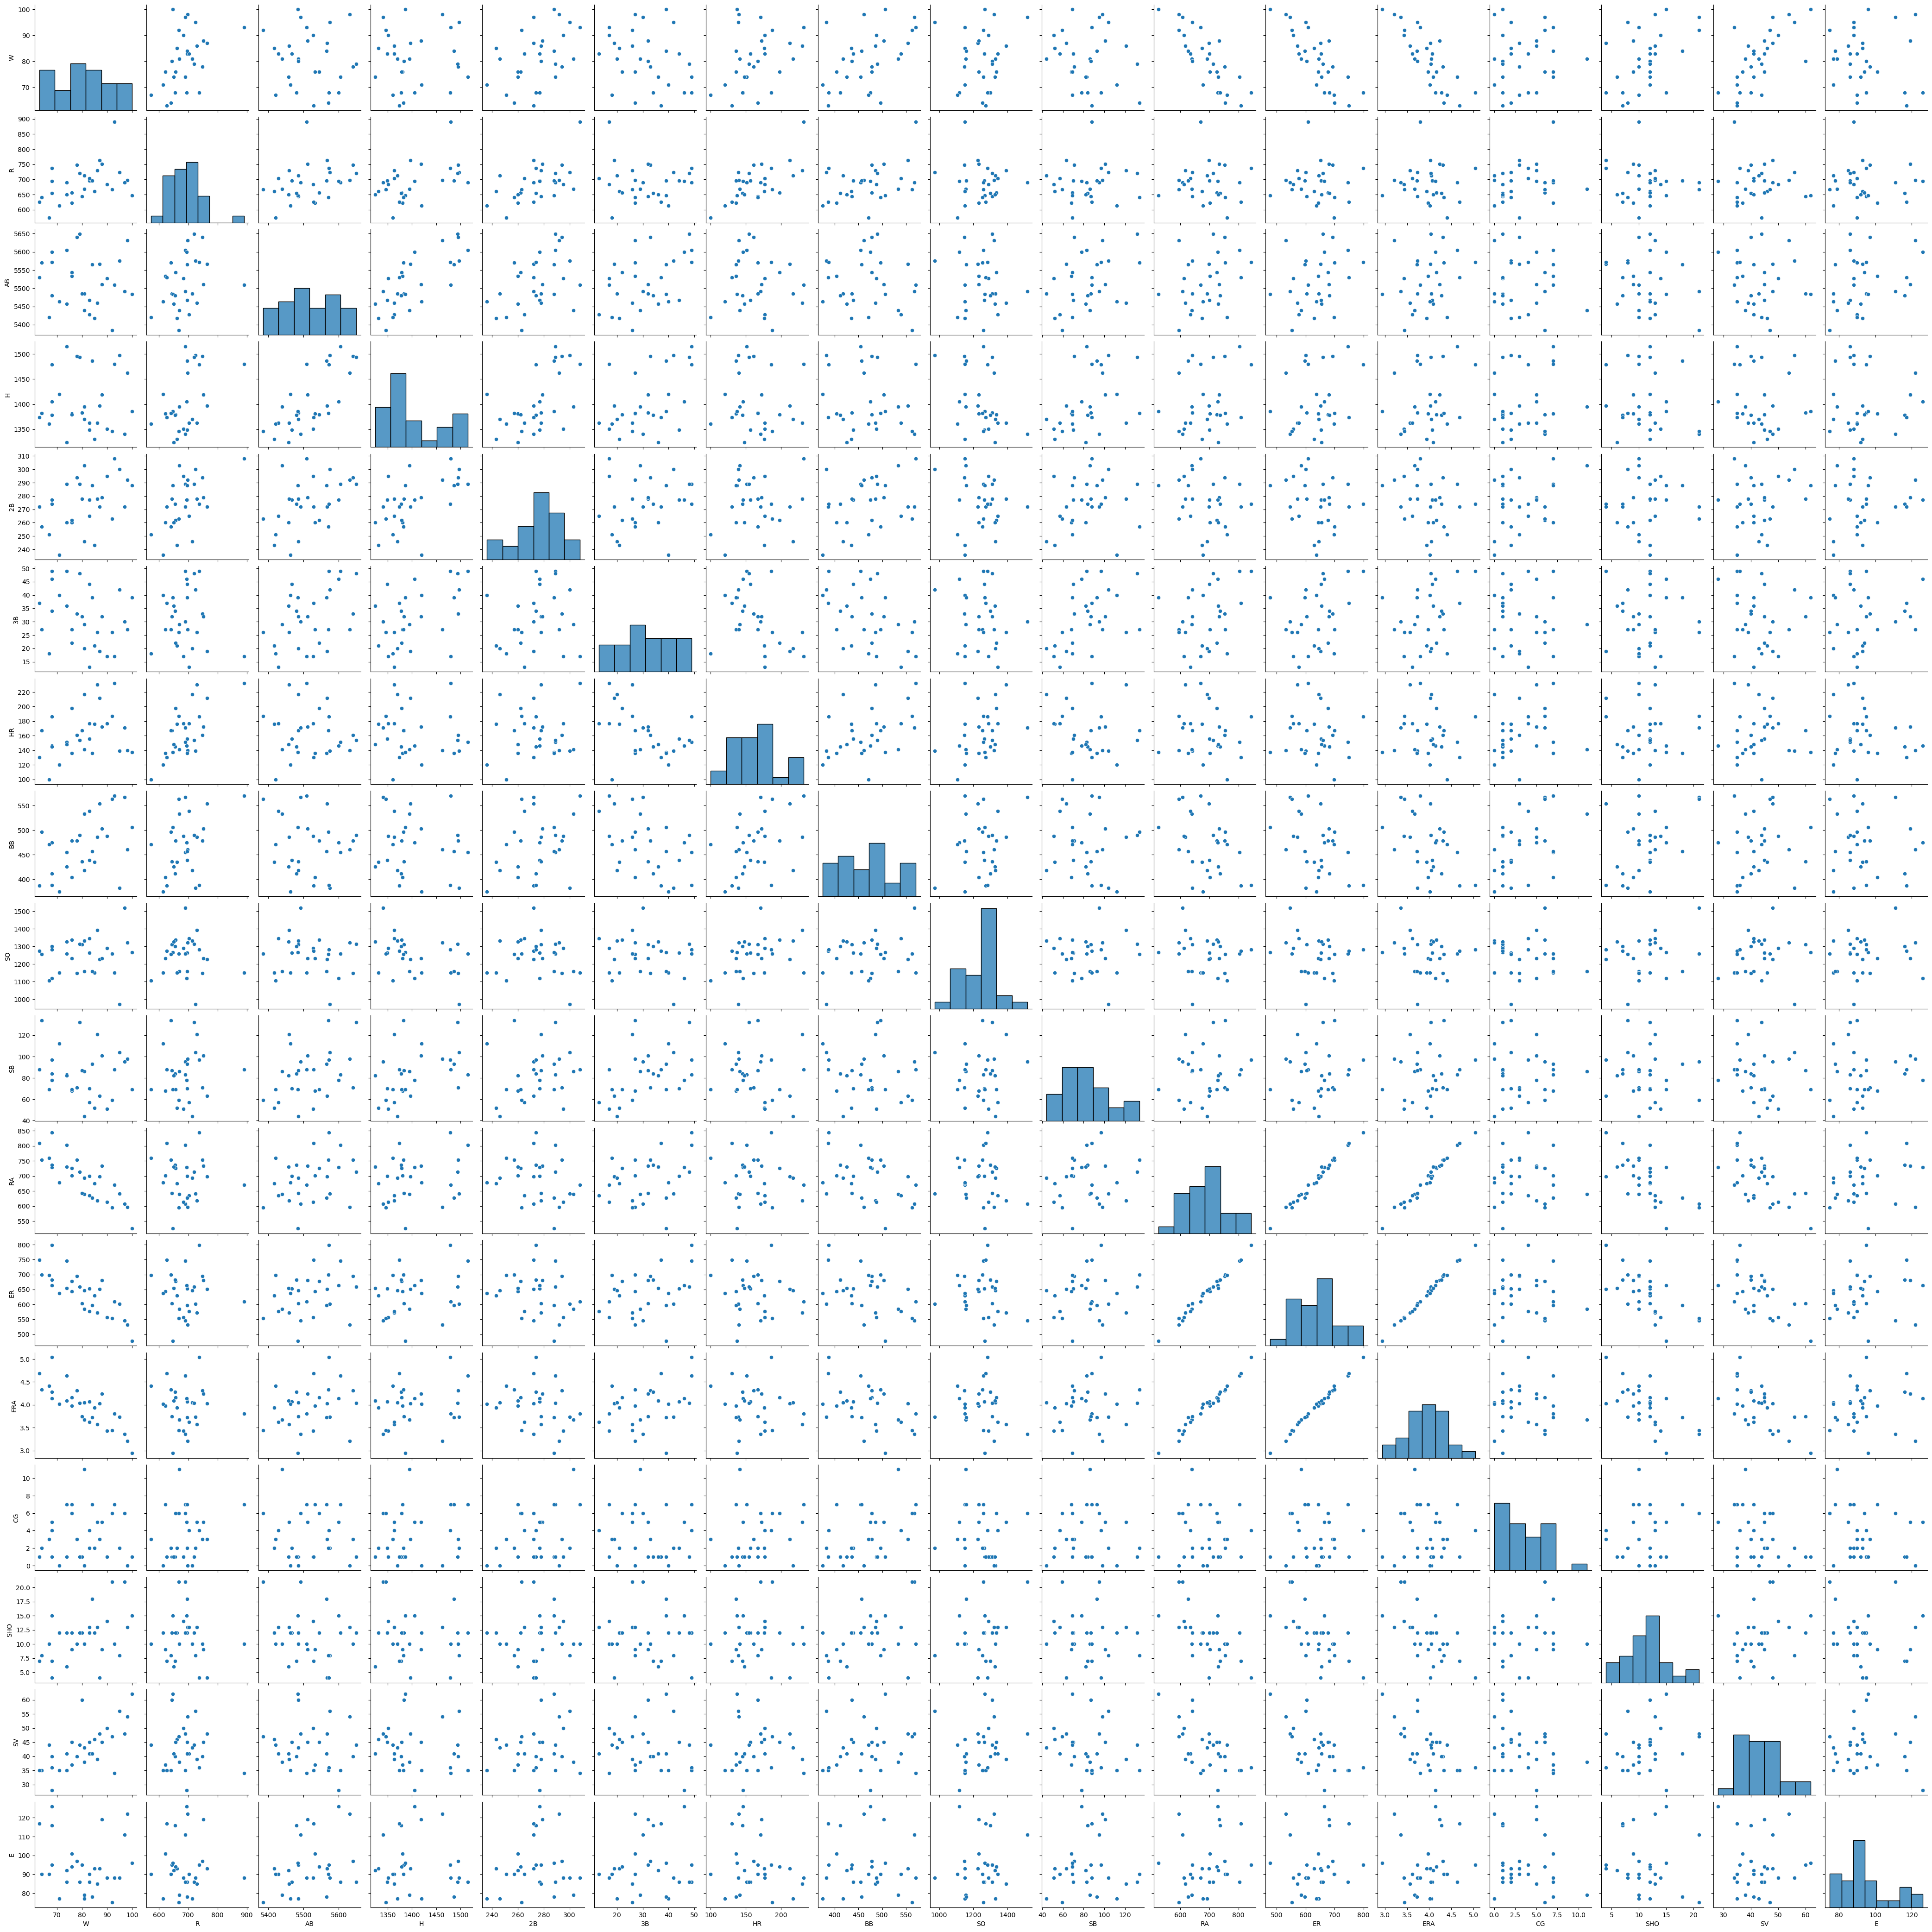

In [19]:
sns.pairplot(df)

#### Checking Outliers

Checking outlier using Boxplot

In [20]:
def outliers_check(df,column_list):
    plt.figure(figsize=(15,12))
    for index,column in enumerate(column_list):
        if index<=len(column_list):
            plt.subplot(3,3,index+1)
            sns.boxplot(df[column],palette='deep',linewidth=.2)
            plt.xlabel(column)
    plt.tight_layout()

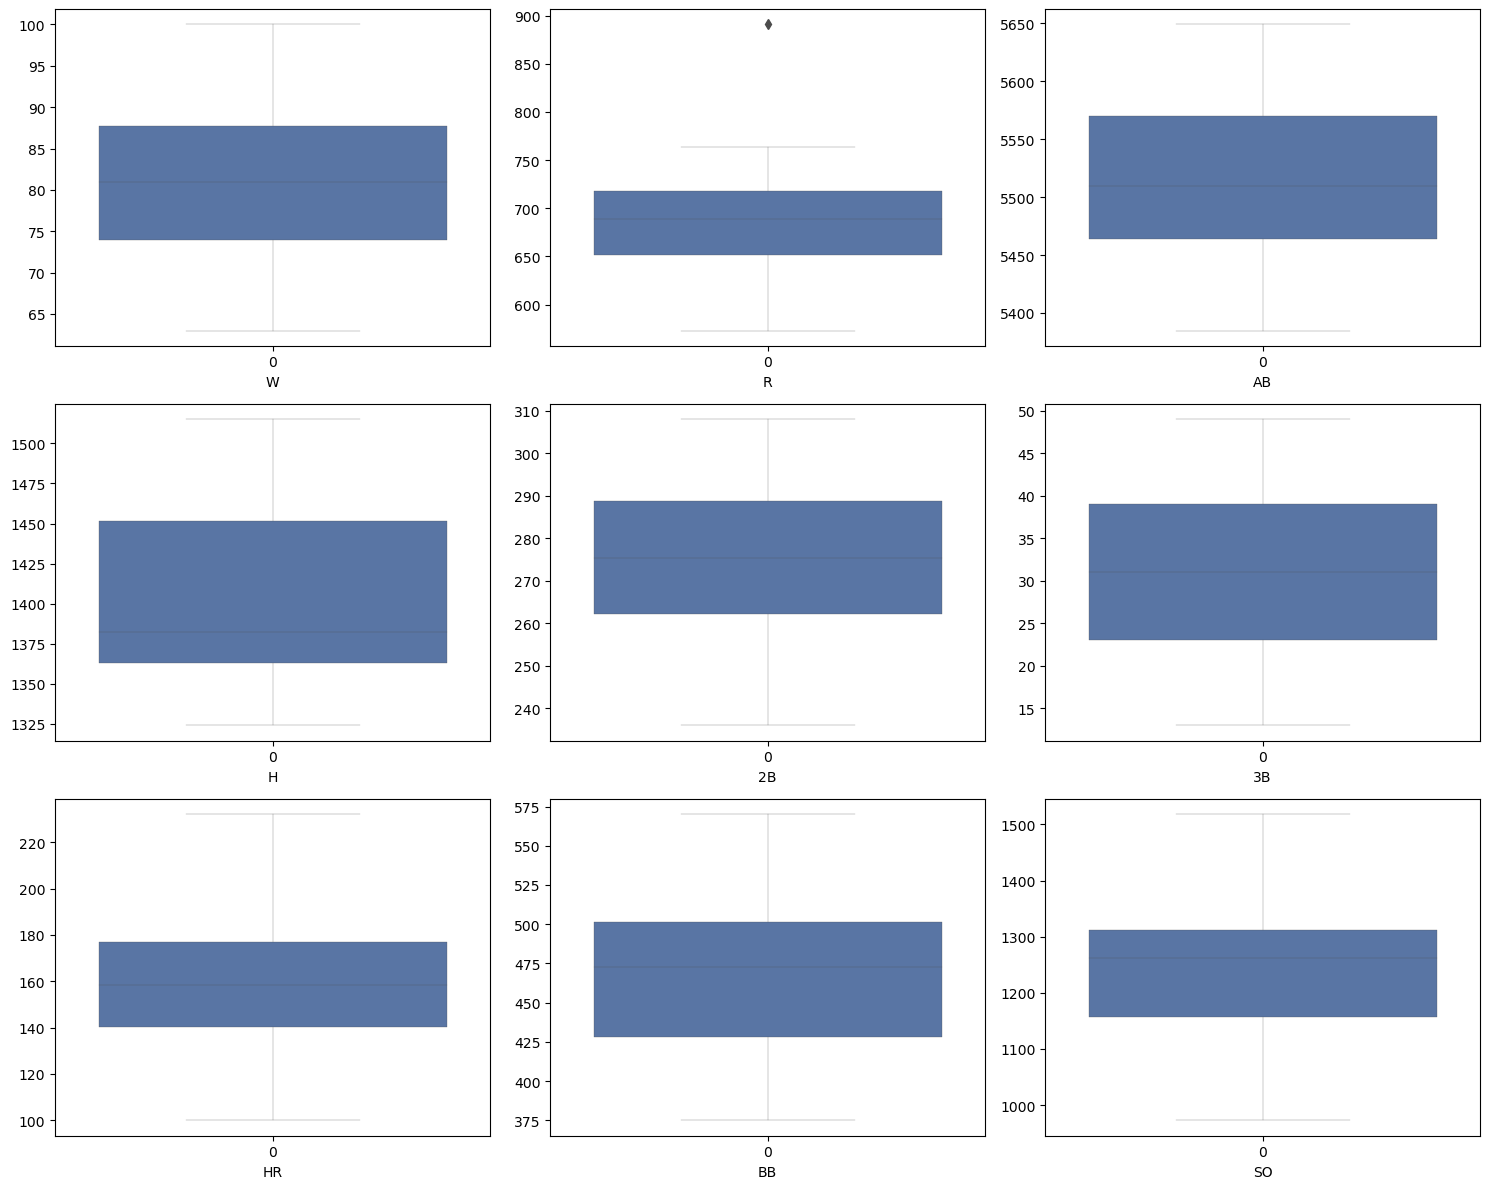

In [21]:
outliers_check(df,column_list_1)

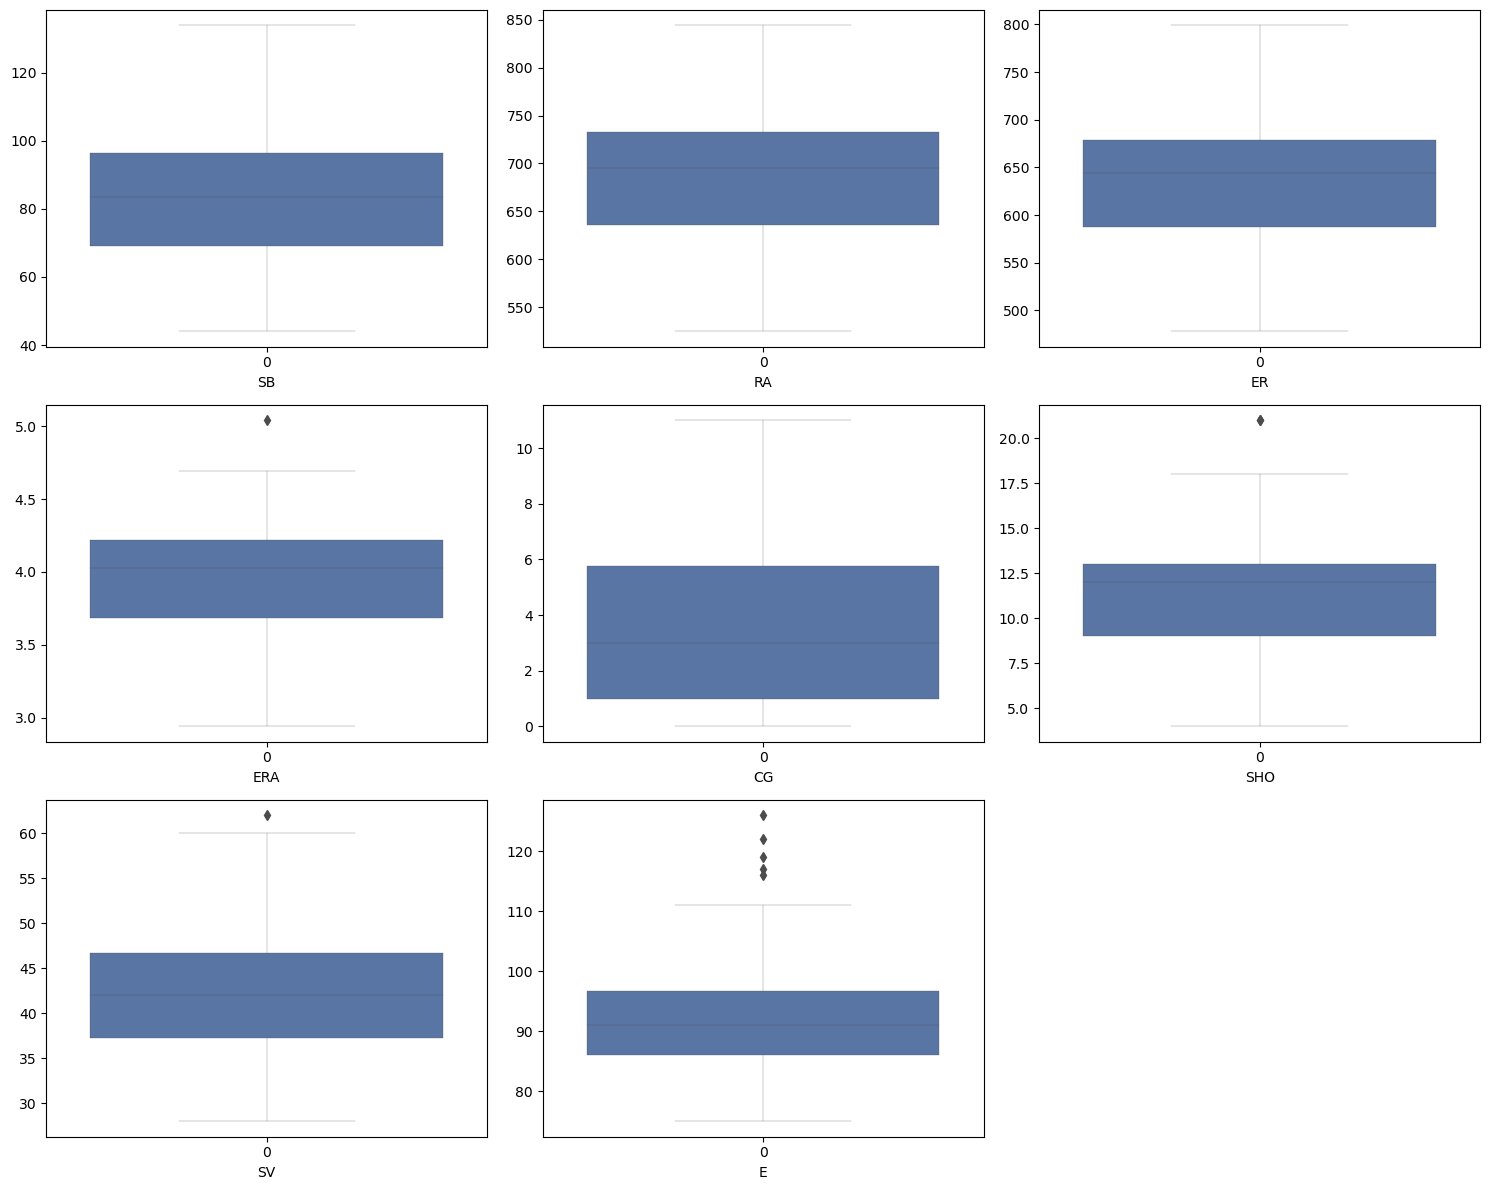

In [22]:
outliers_check(df,column_list_2)

- We can observe that in columns R, ERA, SHO, SV, SLG, WOBA, OPS a few outliers are present. 
- More outliers are present in column E compared to others.

Since the dataset is the record to the teams played match. Hence, we will not remove outliers.

#### Checking Skewness

In [23]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

- We can observe that column R has slightly skewness. Whereas Columns H, CG, SV, E has low skewness.
- We will remove skewness from R only as this column has seen moderate skewness. 

Checking skewness for column R after applying sqrt method

In [24]:
r_skewed_sqr=np.sqrt(df['R'])
r_skewed_sqr.skew()

0.9686758653514262

Checking skewness for column R after applying cbrt method

In [25]:
r_skewed_cbr=np.cbrt(df['R'])
r_skewed_cbr.skew()

0.892969897879559

Checking skewness for column R after applying log method

In [26]:
r_skewed_log=np.log(df['R'])
r_skewed_log.skew()

0.7441956366104983

- We can observe that by applying np.log method the skewness is low. Hence, applying np.log method

Applying log transformation to R

In [27]:
df['R']=r_skewed_log

Checking skewness for column E after appyling sqrt method

Checking skewness level for column E after appyling cbrt method

Applying log transformation to E

checking final skewness

In [28]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

- We can observe that no skewness is present in the dataset.

Checking correlation among columns

In [29]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Checking correlation using heatmap`

<Axes: >

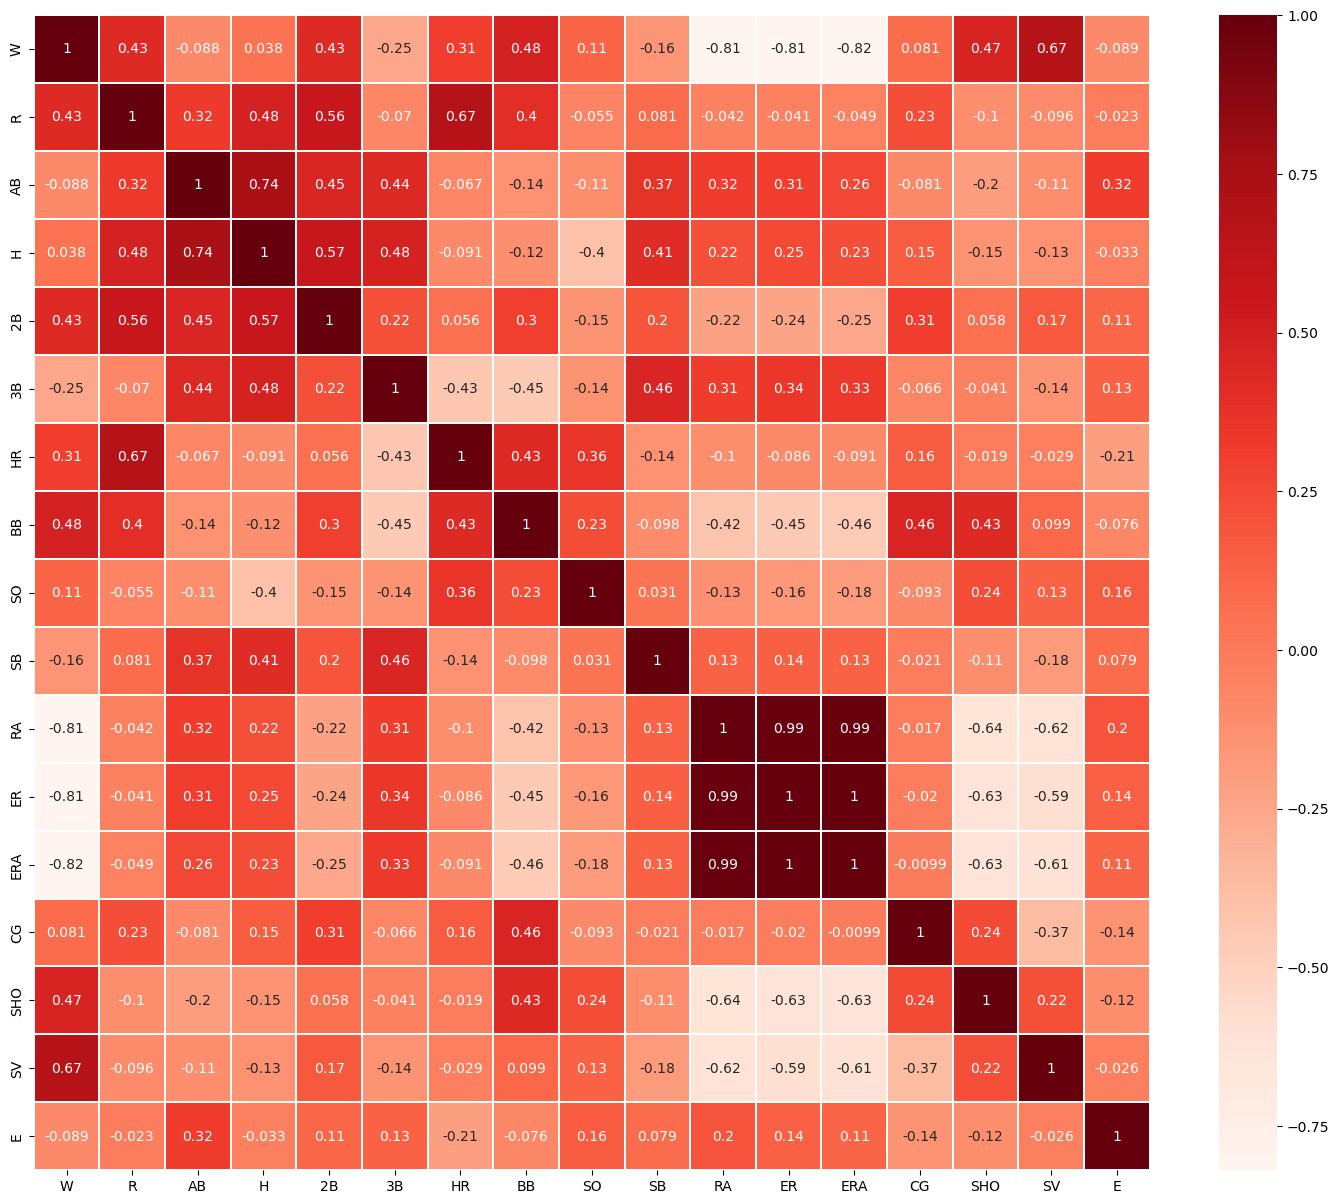

In [30]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,fmt='.2g',cmap='Reds',linewidth=.2)

- Win has highly negative correlated with ERA, ER and RA.
- Win has low to moderate correlation with SV, SHO, BB, 2B and R
- RA, ER and ERA are highly correlated to each other.
- AB and H has moderate correlation

Barplot to check the correlation of features with Win (W)

Text(0.5, 1.0, 'Correlation of Features with W')

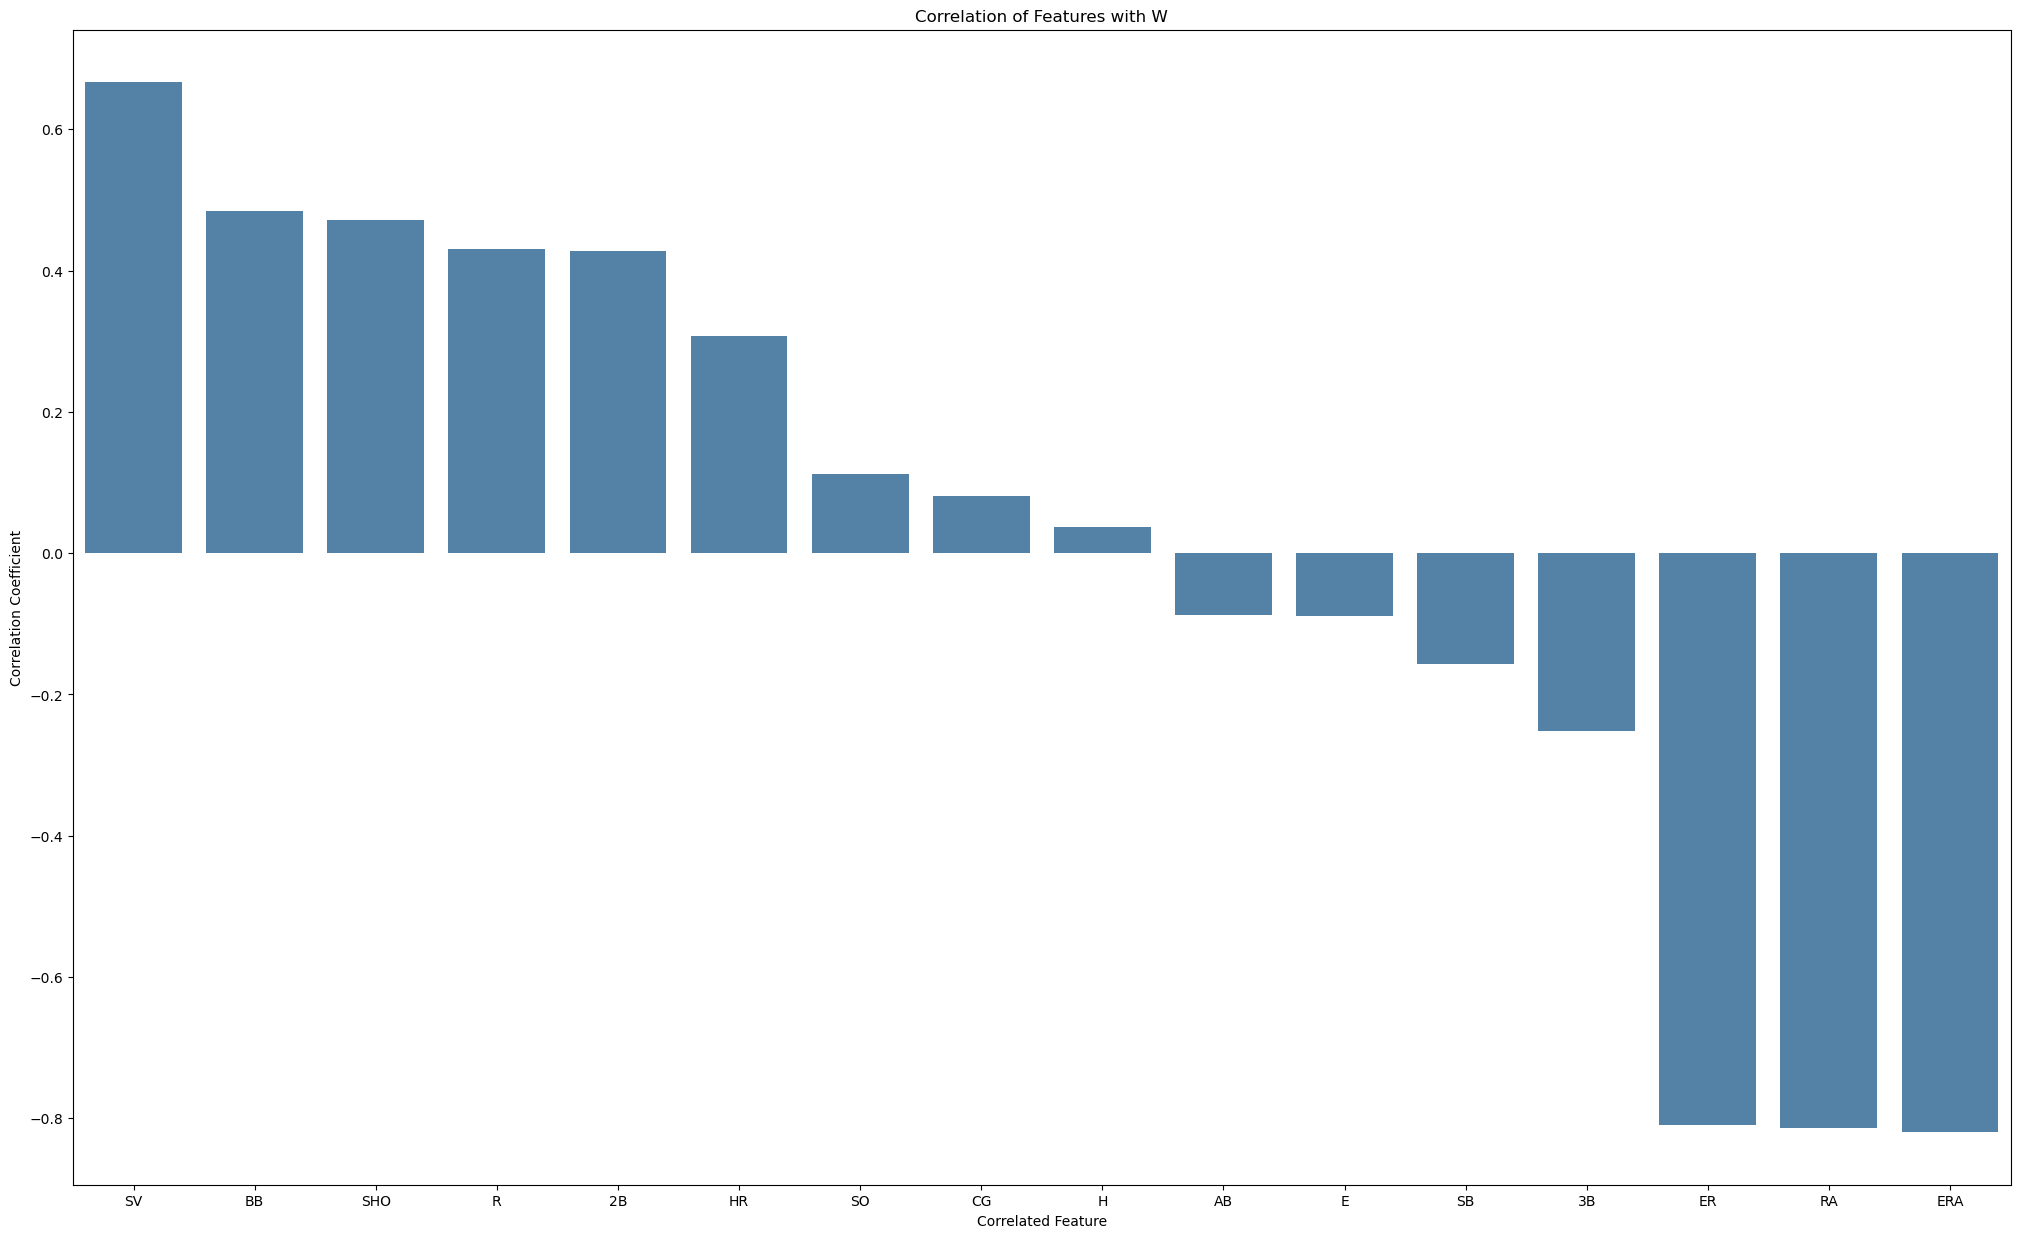

In [31]:
plt.figure(figsize=(25,15))
corr = df.corr()['W']
sorted_corr=corr.sort_values(ascending=False).drop('W')
sns.barplot(x=sorted_corr.index, y=sorted_corr.values,color='steelblue')
plt.xlabel('Correlated Feature')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation of Features with W')

- Columns R, 2B, BB, SHO, OBP, WOBA, OPS, BB% are low to moderately positive correlated with W.
- Columns Sv is moderately positive correlated with W.
- Columns RA, ER and ERA is is moderate to high negative correlated.
- Columns AB, H, SO, CG, E, 1B, BA and K% has not much correlation with W.

#### Feature Engineering

Splitting the dataset into features and target variable

In [32]:
x=df.drop('W',axis=1)
y=df['W']

Scaling using StandardScaler

In [33]:
def standardscaler(x):
    st=StandardScaler()
    x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
    return x

In [34]:
x=standardscaler(x)

Checking the x after scaling

In [35]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


Checking the variance inflation factor

In [36]:
def vif_cal(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF Factor']=[VIF(x.values,i) for i in range(x.shape[1])]
    return vif

In [37]:
vif_cal(x)

,Features,VIF Factor
0,R,11.522370
1,AB,13.311532
2,H,10.070668
3,2B,4.019297
4,3B,3.294146
5,HR,10.079902
6,BB,3.806098
7,SO,2.652401
8,SB,2.102684
9,RA,191.839155


- We can observe high variance at columns RA, ER and ERA. Hence we will drop column ER.

Dropping column ER

In [38]:
x.drop('ER',axis=1,inplace=True)

In [39]:
vif_cal(x)

,Features,VIF Factor
0,R,11.158733
1,AB,5.863764
2,H,9.628749
3,2B,3.786446
4,3B,3.293109
5,HR,9.057309
6,BB,3.791451
7,SO,2.607389
8,SB,1.849280
9,RA,122.133235


- The variance at columns RA and ERA are high. Hence we will drop column RA.

Dropping column RA

In [40]:
x.drop('RA',axis=1,inplace=True)

In [41]:
vif_cal(x)

,Features,VIF Factor
0,R,10.987898
1,AB,4.399954
2,H,8.941874
3,2B,3.729413
4,3B,3.142717
5,HR,7.882841
6,BB,3.468244
7,SO,2.155496
8,SB,1.819823
9,ERA,4.951981


- The varicance inflation factor is now within the acceptable range.

Now the dataset is scaled and balanced. Hence we can build the regression model.

## Modeling

Checking the best random state

In [42]:
def best_random_state(x,y):
    best_randomstate=0
    best_score=0
    lr=LinearRegression()
    for i in range(1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3, random_state=i)
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        score=r2_score(y_test,pred)
        if score>best_score:
            best_score=score
            best_randomstate=i
    
    print('R2 Score :{} Random state :{}'.format(best_score,best_randomstate))

In [43]:
best_random_state(x,y)

R2 Score :0.9504269580018836 Random state :6


Applying train_test_split with test_size=.30 and random_state=6

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=6)

Modeling with Linear Regression

In [45]:
def linear_regression(x_train,x_test,y_train,y_test):
    
    model_lr=LinearRegression()
    model_lr.fit(x_train,y_train)
    prediction_lr=model_lr.predict(x_test)
    prediction_y_train=model_lr.predict(x_train)
    
    r2=r2_score(y_test,prediction_lr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_lr)
    mse=mean_squared_error(y_test,prediction_lr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_lr))
    prediction_chart=pd.DataFrame({'Linear Regression':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_lr 

In [46]:
prediction_chart,prediction_lr=linear_regression(x_train,x_test,y_train,y_test)
prediction_chart

,Linear Regression,Scores
0,R2 Score,95.042696
1,R2 Score on Training Data,92.351129
2,Mean Absolute Error,2.196165
3,Mean Squared Error,5.827586
4,Root Mean Squared Error,2.414039


Modeling with Lasso 

In [47]:
def lasso(x_train,x_test,y_train,y_test):
    
    model_lasso=Lasso()
    model_lasso.fit(x_train,y_train)
    prediction_las=model_lasso.predict(x_test)
    prediction_y_train=model_lasso.predict(x_train)
    
    r2=r2_score(y_test,prediction_las) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_las)
    mse=mean_squared_error(y_test,prediction_las)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_las))
    prediction_chart=pd.DataFrame({'Lasso':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_las

In [48]:
prediction_chart,prediction_las=lasso(x_train,x_test,y_train,y_test)
prediction_chart

,Lasso,Scores
0,R2 Score,82.421800
1,R2 Score on Training Data,85.840635
2,Mean Absolute Error,3.877830
3,Mean Squared Error,20.664151
4,Root Mean Squared Error,4.545784


Modeling with Ridge

In [49]:
def ridge(x_train,x_test,y_train,y_test):
    
    model_ridge=Ridge()
    model_ridge.fit(x_train,y_train)
    prediction_ridge=model_ridge.predict(x_test)
    prediction_y_train=model_ridge.predict(x_train)
    
    r2=r2_score(y_test,prediction_ridge) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_ridge)
    mse=mean_squared_error(y_test,prediction_ridge)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_ridge))
    prediction_chart=pd.DataFrame({'Ridge':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_ridge

In [50]:
prediction_chart,prediction_ridge=ridge(x_train,x_test,y_train,y_test)
prediction_chart

,Ridge,Scores
0,R2 Score,94.272599
1,R2 Score on Training Data,91.279026
2,Mean Absolute Error,2.065997
3,Mean Squared Error,6.732878
4,Root Mean Squared Error,2.594779


Modeling with Random Forest

In [51]:
def random_forest(x_train,x_test,y_train,y_test):
    
    model_ran_forest=RandomForestRegressor()
    model_ran_forest.fit(x_train,y_train)
    prediction_rf=model_ran_forest.predict(x_test)
    prediction_y_train=model_ran_forest.predict(x_train)
    
    r2=r2_score(y_test,prediction_rf) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_rf)
    mse=mean_squared_error(y_test,prediction_rf)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_rf))
    prediction_chart=pd.DataFrame({'Random Forest':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_rf

In [52]:
prediction_chart, prediction_rf=random_forest(x_train,x_test,y_train,y_test)
prediction_chart

,Random Forest,Scores
0,R2 Score,62.628308
1,R2 Score on Training Data,92.101085
2,Mean Absolute Error,5.707778
3,Mean Squared Error,43.932500
4,Root Mean Squared Error,6.628160


Modeling with KNN 

In [53]:
def knn(x_train,x_test,y_train,y_test):
    
    model_knn=KNN()
    model_knn.fit(x_train,y_train)
    prediction_knn=model_knn.predict(x_test)
    prediction_y_train=model_knn.predict(x_train)
    
    r2=r2_score(y_test,prediction_knn) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_knn)
    mse=mean_squared_error(y_test,prediction_knn)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_knn))
    prediction_chart=pd.DataFrame({'KNN':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart,prediction_knn

In [54]:
prediction_chart,prediction_knn=knn(x_train,x_test,y_train,y_test)
prediction_chart

,KNN,Scores
0,R2 Score,57.327032
1,R2 Score on Training Data,61.279423
2,Mean Absolute Error,5.800000
3,Mean Squared Error,50.164444
4,Root Mean Squared Error,7.082686


Modeling with SVR

In [55]:
def svr(x_train,x_test,y_train,y_test):
    
    model_svr=SVR()
    model_svr.fit(x_train,y_train)
    prediction_svr=model_svr.predict(x_test)
    prediction_y_train=model_svr.predict(x_train)
    
    r2=r2_score(y_test,prediction_svr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_svr)
    mse=mean_squared_error(y_test,prediction_svr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_svr))
    prediction_chart=pd.DataFrame({'SVR':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_svr

In [56]:
prediction_chart, prediction_svr=svr(x_train,x_test,y_train,y_test)
prediction_chart

,SVR,Scores
0,R2 Score,4.374291
1,R2 Score on Training Data,21.998006
2,Mean Absolute Error,8.986277
3,Mean Squared Error,112.413333
4,Root Mean Squared Error,10.602515


Modeling with Decision Tree

In [57]:
def decision_tree(x_train,x_test,y_train,y_test):
    
    model_dt=DTR()
    model_dt.fit(x_train,y_train)
    prediction_dt=model_dt.predict(x_test)
    prediction_y_train=model_dt.predict(x_train)
    
    r2=r2_score(y_test,prediction_dt) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_dt)
    mse=mean_squared_error(y_test,prediction_dt)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_dt))
    prediction_chart=pd.DataFrame({'Decision Tree':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_dt

In [58]:
prediction_chart, prediction_dt=decision_tree(x_train,x_test,y_train,y_test)
prediction_chart

,Decision Tree,Scores
0,R2 Score,66.918715
1,R2 Score on Training Data,100.000000
2,Mean Absolute Error,5.333333
3,Mean Squared Error,38.888889
4,Root Mean Squared Error,6.236096


Modeling with Gradient Boosting Regressor

In [59]:
def gradient_boosting(x_train,x_test,y_train,y_test):
    
    model_gbr=GradientBoostingRegressor()
    model_gbr.fit(x_train,y_train)
    prediction_gb=model_gbr.predict(x_test)
    prediction_y_train=model_gbr.predict(x_train)
    
    r2=r2_score(y_test,prediction_gb) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_gb)
    mse=mean_squared_error(y_test,prediction_gb)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_gb))
    prediction_chart=pd.DataFrame({'Gradient Boosting Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_gb

In [60]:
prediction_chart, prediction_gb=gradient_boosting(x_train,x_test,y_train,y_test)
prediction_chart

,Gradient Boosting Regressor,Scores
0,R2 Score,63.218686
1,R2 Score on Training Data,99.999984
2,Mean Absolute Error,5.042717
3,Mean Squared Error,43.238478
4,Root Mean Squared Error,6.575597


Modeling with ExtraTrees Regression

In [61]:
def extra_trees_regressor(x_train,x_test,y_train,y_test):
    
    model_etr=ExtraTreesRegressor()
    model_etr.fit(x_train,y_train)
    prediction_etr=model_etr.predict(x_test)
    prediction_y_train=model_etr.predict(x_train)
    
    r2=r2_score(y_test,prediction_etr) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_etr)
    mse=mean_squared_error(y_test,prediction_etr)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_etr))
    prediction_chart=pd.DataFrame({'Extra Trees Regressor':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_etr

In [62]:
prediction_chart, prediction_etr=extra_trees_regressor(x_train,x_test,y_train,y_test)
prediction_chart

,Extra Trees Regressor,Scores
0,R2 Score,39.930444
1,R2 Score on Training Data,100.000000
2,Mean Absolute Error,6.743333
3,Mean Squared Error,70.615100
4,Root Mean Squared Error,8.403279


In [63]:
def lassolarscv(x_train,x_test,y_train,y_test):
    
    model_llcv=LassoLarsCV()
    model_llcv.fit(x_train,y_train)
    prediction_llcv=model_llcv.predict(x_test)
    prediction_y_train=model_llcv.predict(x_train)
    
    r2=r2_score(y_test,prediction_llcv) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_llcv)
    mse=mean_squared_error(y_test,prediction_llcv)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_llcv))
    prediction_chart=pd.DataFrame({'LassoLarsCV':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_llcv

In [64]:
prediction_chart, prediction_llcv=lassolarscv(x_train,x_test,y_train,y_test)
prediction_chart

,LassoLarsCV,Scores
0,R2 Score,86.857503
1,R2 Score on Training Data,87.964496
2,Mean Absolute Error,3.164435
3,Mean Squared Error,15.449736
4,Root Mean Squared Error,3.930615


In [65]:
def lassolars(x_train,x_test,y_train,y_test):
    
    model_ll=LassoLars()
    model_ll.fit(x_train,y_train)
    prediction_ll=model_ll.predict(x_test)
    prediction_y_train=model_ll.predict(x_train)
    
    r2=r2_score(y_test,prediction_ll) * 100
    r2_train=r2_score(y_train,prediction_y_train) * 100
    mae=mean_absolute_error(y_test,prediction_ll)
    mse=mean_squared_error(y_test,prediction_ll)
    rmse=np.sqrt(mean_squared_error(y_test,prediction_ll))
    prediction_chart=pd.DataFrame({'LassoLars':['R2 Score',
                                             'R2 Score on Training Data',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2,r2_train,mae,mse,rmse]
                                  })
    return prediction_chart, prediction_ll

In [66]:
prediction_chart, prediction_ll=lassolars(x_train,x_test,y_train,y_test)
prediction_chart

,LassoLars,Scores
0,R2 Score,82.422011
1,R2 Score on Training Data,85.840649
2,Mean Absolute Error,3.877765
3,Mean Squared Error,20.663903
4,Root Mean Squared Error,4.545757


Cross validating the models

In [67]:
def cross_validation(x,y,*args):
    
    # Cross validation for LinearRegression
    cv_score_lr= cross_val_score(LinearRegression(),x,y,cv=5, scoring='r2')
    cv_r2_score_lr=cv_score_lr.mean()
    r2_lr=r2_score(y_test,prediction_lr)
    score_diff_lr=(r2_lr-cv_r2_score_lr)
    
    # Cross validation for Lasso
    cv_score_las= cross_val_score(Lasso(),x,y,cv=5, scoring='r2')
    cv_r2_score_las=cv_score_las.mean()
    r2_las=r2_score(y_test,prediction_las)
    score_diff_las=(r2_las-cv_r2_score_las)
    
    # Cross validation for Ridge
    cv_score_ridge= cross_val_score(Ridge(),x,y,cv=5, scoring='r2')
    cv_r2_score_ridge=cv_score_ridge.mean()
    r2_ridge=r2_score(y_test,prediction_ridge)
    score_diff_ridge=(r2_ridge-cv_r2_score_ridge)
    
    # Cross validation for Random Forest
    cv_score_rf= cross_val_score(RandomForestRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_rf=cv_score_rf.mean()
    r2_rf=r2_score(y_test,prediction_rf)
    score_diff_rf=(r2_rf-cv_r2_score_rf)
    
    # Cross validation for KNN
    cv_score_knn= cross_val_score(KNN(),x,y,cv=5, scoring='r2')
    cv_r2_score_knn=cv_score_knn.mean()
    r2_knn=r2_score(y_test,prediction_knn)
    score_diff_knn=(r2_knn-cv_r2_score_knn)
    
    # Cross validation for SVR
    cv_score_svr= cross_val_score(SVR(),x,y,cv=5, scoring='r2')
    cv_r2_score_svr=cv_score_svr.mean()
    r2_svr=r2_score(y_test,prediction_svr)
    score_diff_svr=(r2_svr-cv_r2_score_svr)
    
    # Cross validation for Decision Tree
    cv_score_dt= cross_val_score(DTR(),x,y,cv=5, scoring='r2')
    cv_r2_score_dt=cv_score_dt.mean()
    r2_dt=r2_score(y_test,prediction_dt)
    score_diff_dt=(r2_dt-cv_r2_score_dt)
    
    # Cross validation for GradientBoost
    cv_score_gb= cross_val_score(GradientBoostingRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_gb=cv_score_gb.mean()
    r2_gb=r2_score(y_test,prediction_gb)
    score_diff_gb=(r2_gb-cv_r2_score_gb)
    
    # Cross validation for ExtraTreesRegressor
    cv_score_etr= cross_val_score(ExtraTreesRegressor(),x,y,cv=5, scoring='r2')
    cv_r2_score_etr=cv_score_etr.mean()
    r2_etr=r2_score(y_test,prediction_etr)
    score_diff_etr=(r2_etr-cv_r2_score_etr)
    
    # Cross validation for LassoLarsCV
    cv_score_llcv= cross_val_score(LassoLarsCV(),x,y,cv=5, scoring='r2')
    cv_r2_score_llcv=cv_score_llcv.mean()
    r2_llcv=r2_score(y_test,prediction_llcv)
    score_diff_llcv=(r2_llcv-cv_r2_score_llcv)
    
    # Cross validation for GradientBoost
    cv_score_ll= cross_val_score(LassoLars(),x,y,cv=5, scoring='r2')
    cv_r2_score_ll=cv_score_ll.mean()
    r2_ll=r2_score(y_test,prediction_ll)
    score_diff_ll=(r2_ll-cv_r2_score_ll)
    
    df=pd.DataFrame({'Regression Name':['LinearRegression',
                                        'Lasso',
                                        'Ridge',
                                        'Random Forest',
                                        'KNN',
                                        'SVR',
                                        'Decision Tree',
                                        'GradientBoost',
                                        'ExtraTreesRegressor',
                                        'LassoLarsCV',
                                        'LassoLars'],
                     'Regression Score':[r2_lr,r2_las,r2_ridge,r2_rf,r2_knn,r2_svr,r2_dt,r2_gb,r2_etr,r2_llcv,r2_ll],
                     'Cross Val Score':[cv_r2_score_lr,cv_r2_score_las,cv_r2_score_ridge, cv_r2_score_rf,cv_r2_score_knn,
                                        cv_r2_score_svr,cv_r2_score_dt,cv_r2_score_gb,cv_r2_score_etr,cv_r2_score_llcv,cv_r2_score_ll],
                     'Difference': [score_diff_lr,score_diff_las,score_diff_ridge,score_diff_rf,score_diff_knn,score_diff_svr,
                                    score_diff_dt,score_diff_gb,score_diff_etr,score_diff_llcv,score_diff_ll]
                    })
    return df

In [68]:
pred=[prediction_lr, prediction_las, prediction_ridge, prediction_rf, prediction_knn,prediction_svr,prediction_dt, prediction_gb, prediction_etr,prediction_llcv,prediction_ll]

In [69]:
cross_validation(x,y,y_test, *pred)

,Regression Name,Regression Score,Cross Val Score,Difference
0,LinearRegression,0.950427,0.374180,0.576247
1,Lasso,0.824218,0.541807,0.282411
2,Ridge,0.942726,0.379183,0.563543
3,Random Forest,0.626283,-0.681438,1.307721
4,KNN,0.573270,-0.297157,0.870428
5,SVR,0.043743,-0.388864,0.432607
6,Decision Tree,0.669187,-2.301327,2.970515
7,GradientBoost,0.632187,-1.174678,1.806864
8,ExtraTreesRegressor,0.399304,-0.381341,0.780645
9,LassoLarsCV,0.868575,0.583507,0.285068


- Models like LinearRegression and Ridge have high training scores but their validation scores are significantly lower, indicating overfitting. Random Forest, KNN, and other models show even worse performance on the validation set.

- Therefore, based on the given data, LassoLarsCV is the best model to use.

#### GridSearchCV Hyperparameter Tuning

In [70]:
parameters={'fit_intercept': [True, False],
            'precompute': [True, False, 'auto'],
            'max_iter': [100, 500, 1000],
            'cv': [5, 10, 15],
            'n_jobs': [None, -1, 1]
           }

In [71]:
gridsearch_cv=GridSearchCV(LassoLarsCV(),parameters,cv=5)
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LassoLarsCV(),
             param_grid={'cv': [5, 10, 15], 'fit_intercept': [True, False],
                         'max_iter': [100, 500, 1000], 'n_jobs': [None, -1, 1],
                         'precompute': [True, False, 'auto']})

In [72]:
gridsearch_cv.best_params_

{'cv': 10,
 'fit_intercept': True,
 'max_iter': 100,
 'n_jobs': None,
 'precompute': False}

#### Creating the final model

In [73]:
def finalmodel(x_train,x_test,y_train,y_test):
    final_model=LassoLarsCV(cv=10,fit_intercept=True,max_iter=100,n_jobs=None,precompute=False)
    final_model.fit(x_train,y_train)
    pred=final_model.predict(x_test)
    r2=r2_score(y_test,pred)
    mse=mean_squared_error(y_test,pred)
    mae=mean_absolute_error(y_test,pred)
    rmse=np.sqrt(mean_absolute_error(y_test,pred))

    prediction_chart=pd.DataFrame({'Final model (LassoLarsCV)':['R2 Score',
                                             'Mean Absolute Error',
                                             'Mean Squared Error', 
                                             'Root Mean Squared Error'], 
                                   'Scores':[r2*100,mae,mse,rmse]
                                  })
    prediction_chart
    return prediction_chart, final_model

In [74]:
prediction_chart, final_model=finalmodel(x_train,x_test,y_train,y_test)
prediction_chart

,Final model (LassoLarsCV),Scores
0,R2 Score,87.258768
1,Mean Absolute Error,3.083854
2,Mean Squared Error,14.978026
3,Root Mean Squared Error,1.756091


Using Joblib

In [75]:
import pickle

In [76]:
file='Baseball_win_prediction.pkl'
pickle.dump(final_model,open(file,'wb'))

In [77]:
test_model=pickle.load(open('Baseball_win_prediction.pkl','rb'))
predict=test_model.score(x_test,y_test)
print(predict)

0.872587678054697


In [78]:
pd.DataFrame([test_model.predict(x_test)[:],y_test[:]],index=['Predict','Original'])

,0,1,2,3,4,5,6,7,8
Predict,90.549324,76.294364,82.390386,86.431273,90.089055,70.709736,81.54132,92.13231,73.020844
Original,95.000000,74.000000,79.000000,87.000000,97.000000,64.000000,81.00000,93.00000,71.000000
